In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import boxcox, inv_boxcox
from scipy import stats
from PIL import Image


In [2]:
!ls data

customers.csv  products.csv  relation.csv


Se pueden realizar pruebas con cualquier compañía pero me gustaría empezar por la 23 y 15.

In [3]:
dataPath = "data/"

df_products = pd.read_csv(dataPath + "products.csv")
df_clients  = pd.read_csv(dataPath + "customers.csv")
df_relation = pd.read_csv(dataPath + "relation.csv")

/tmp/ipykernel_772/3227325611.py:3: DtypeWarning: Columns (20,32,34,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_products = pd.read_csv(dataPath + "products.csv")
/tmp/ipykernel_772/3227325611.py:4: DtypeWarning: Columns (7,9,10,11,12,13,17,18,21,26,27,28,30,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clients  = pd.read_csv(dataPath + "customers.csv")


In [4]:
df_relation

,company_id,product_id,customer_id,peso,ultimo
0,1,1,3,6.0,2018-11-29 00:28:00
1,1,1,5,183.0,2022-08-29 15:18:18
2,1,1,6,6.0,2018-12-24 19:41:00
3,1,1,7,39.0,2022-04-29 13:56:42
4,1,1,8,3.0,2019-10-10 20:11:00
...,...,...,...,...,...
636562,40,126862,510949,3.0,2022-10-03 00:20:19
636563,40,126863,537570,3.0,2022-10-02 13:39:19
636564,40,126864,510626,3.0,2022-10-02 21:58:56
636565,40,126971,509931,3.0,2022-10-02 22:42:54


## No hay duplicados

In [39]:
df_relation [ df_relation[["company_id", "product_id", "customer_id"]].duplicated() ]

,company_id,product_id,customer_id,peso,ultimo,peso_boxcox


In [40]:
df_relation [ df_relation[["product_id", "customer_id"]].duplicated() ]

,company_id,product_id,customer_id,peso,ultimo,peso_boxcox


## Compañias

In [65]:
real_ids = df_relation.company_id.unique().tolist()
sort_ids = 

dict(zip(L1,L2))

[1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 21,
 23,
 24,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 39,
 40,
 44]

In [63]:
list(range(len(company_ids)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [49]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [67]:
df_comp1 =  df_relation[ df_relation.company_id==1 ]
df_comp1

,company_id,product_id,customer_id,peso,ultimo,peso_boxcox
0,1,1,3,6.0,2018-11-29 00:28:00,2.121110
1,1,1,5,183.0,2022-08-29 15:18:18,8.721185
2,1,1,6,6.0,2018-12-24 19:41:00,2.121110
3,1,1,7,39.0,2022-04-29 13:56:42,5.222620
4,1,1,8,3.0,2019-10-10 20:11:00,1.217070
...,...,...,...,...,...,...
636323,1,38179,58,6.0,2022-10-02 18:42:36,2.121110
636324,1,38186,24,6.0,2022-10-02 22:29:46,2.121110
636325,1,123636,220420,3.0,2022-10-02 21:14:24,1.217070
636326,1,126586,179,6.0,2022-10-02 22:03:02,2.121110


In [78]:
def crete_matrix(df):
    
    real_userIds = df.customer_id.unique().tolist()
    real_itemIds = df.product_id.unique().tolist()
    
    range_userIds = list(range(len(real_userIds)))
    range_itemIds = list(range(len(real_itemIds)))
    
    get_userId = dict(zip(real_userIds,range_userIds))
    get_itemId = dict(zip(real_itemIds,range_itemIds))
        
    matrix = np.zeros((len(real_userIds),len(real_itemIds)),dtype=np.uint8)
    
    for index, row in df.iterrows():
        
        userId = get_userId[row.customer_id]
        itemId = get_itemId[row.product_id]
        
        matrix[userId, itemId] = 255
        
    return matrix

In [81]:
matrix

array([[255,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

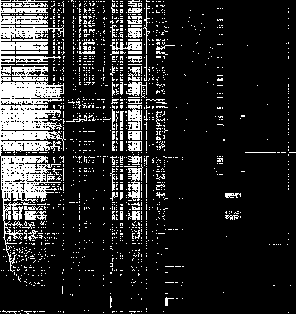

In [83]:
im = Image.fromarray(matrix)
im

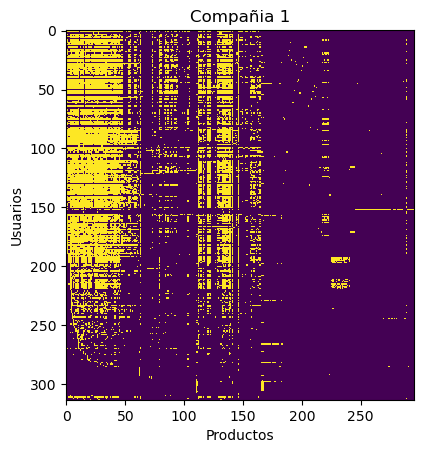

In [80]:
matrix = crete_matrix( df_comp1 )
plt.title('Compañia 1')
plt.xlabel('Productos')
plt.ylabel('Usuarios')
plt.imshow( matrix, interpolation='nearest');

Company 1
	Number of users: 314
	Number of items: 296
	Number of interactions: 14902 ( 16.03 %)


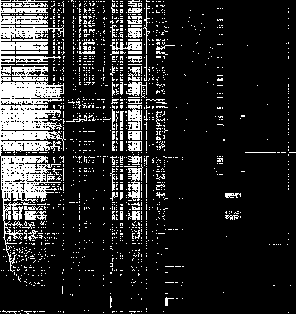

Company 3
	Number of users: 384
	Number of items: 65
	Number of interactions: 847 ( 3.39 %)


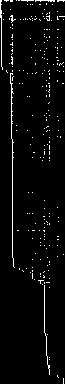

Company 4
	Number of users: 2
	Number of items: 3
	Number of interactions: 5 ( 83.33 %)


Company 5
	Number of users: 21
	Number of items: 111
	Number of interactions: 419 ( 17.98 %)


Company 6
	Number of users: 244
	Number of items: 749
	Number of interactions: 4990 ( 2.73 %)


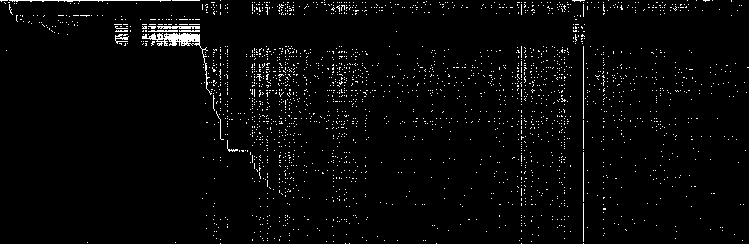

Company 7
	Number of users: 6
	Number of items: 34
	Number of interactions: 41 ( 20.1 %)


Company 8
	Number of users: 5
	Number of items: 21
	Number of interactions: 25 ( 23.81 %)


Company 9
	Number of users: 8
	Number of items: 93
	Number of interactions: 111 ( 14.92 %)


Company 10
	Number of users: 102
	Number of items: 111
	Number of interactions: 541 ( 4.78 %)


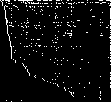

Company 12
	Number of users: 166
	Number of items: 1218
	Number of interactions: 1784 ( 0.88 %)


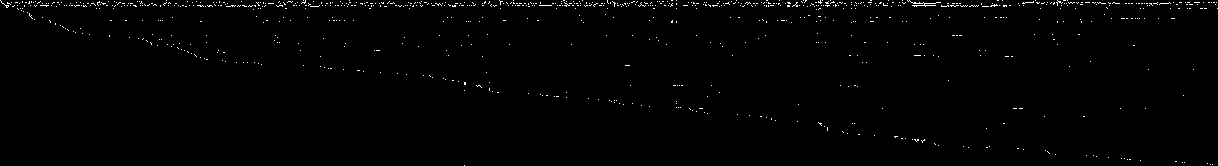

Company 13
	Number of users: 6236
	Number of items: 217
	Number of interactions: 9069 ( 0.67 %)


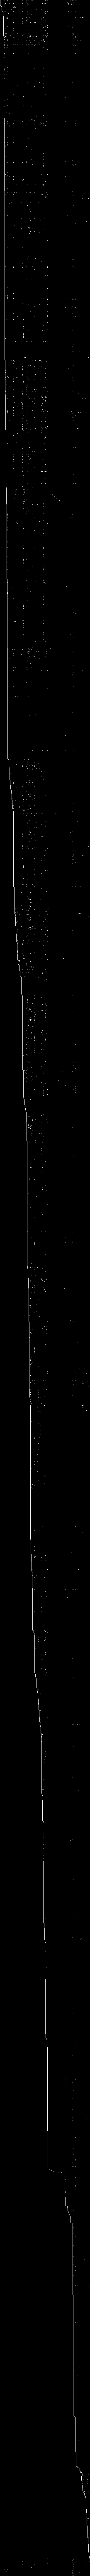

Company 14
	Number of users: 4769
	Number of items: 15338
	Number of interactions: 19459 ( 0.03 %)


Company 15
	Number of users: 28738
	Number of items: 603
	Number of interactions: 58219 ( 0.34 %)


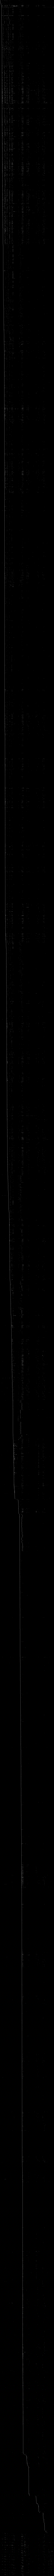

Company 16
	Number of users: 6526
	Number of items: 312
	Number of interactions: 16069 ( 0.79 %)


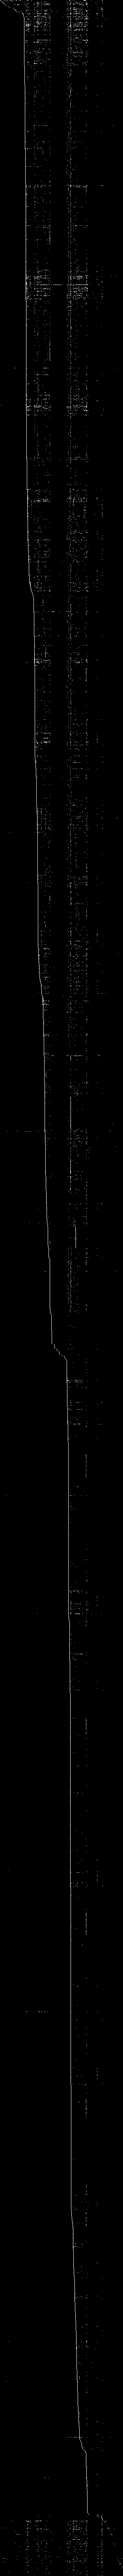

Company 18
	Number of users: 2
	Number of items: 2
	Number of interactions: 2 ( 50.0 %)


Company 19
	Number of users: 5
	Number of items: 32
	Number of interactions: 42 ( 26.25 %)


Company 21
	Number of users: 11958
	Number of items: 384
	Number of interactions: 24037 ( 0.52 %)


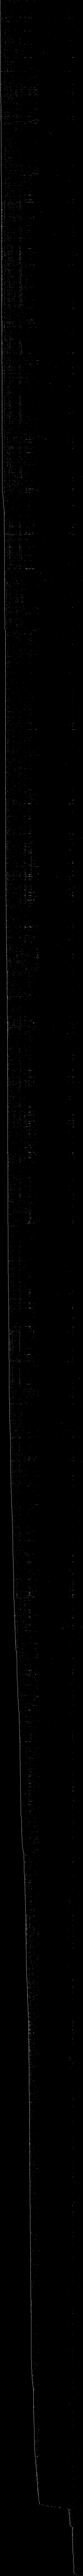

Company 23
	Number of users: 18088
	Number of items: 6311
	Number of interactions: 88005 ( 0.08 %)


Company 24
	Number of users: 9596
	Number of items: 736
	Number of interactions: 23032 ( 0.33 %)


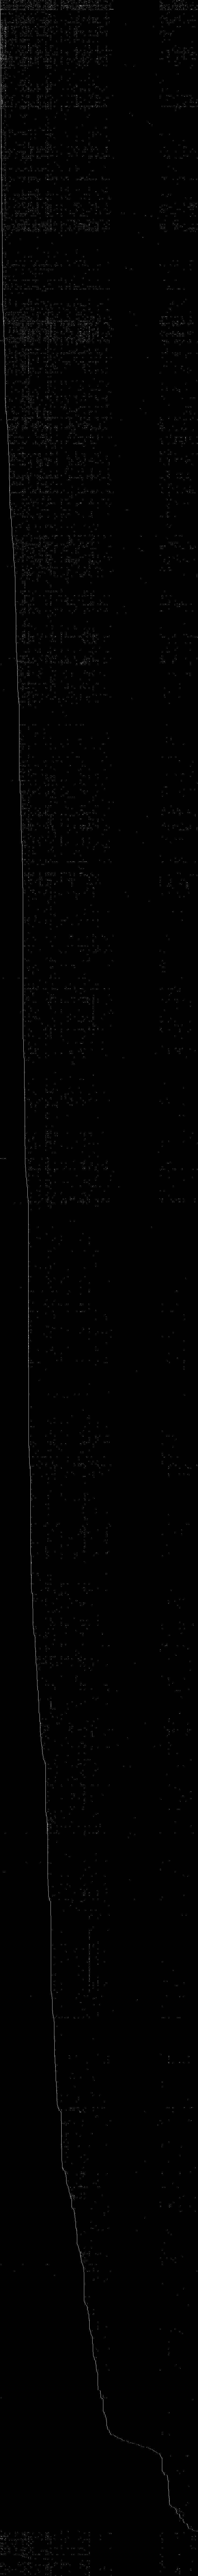

Company 29
	Number of users: 467
	Number of items: 39
	Number of interactions: 663 ( 3.64 %)


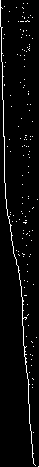

Company 30
	Number of users: 1
	Number of items: 30
	Number of interactions: 30 ( 100.0 %)


Company 31
	Number of users: 86
	Number of items: 23
	Number of interactions: 201 ( 10.16 %)


Company 32
	Number of users: 29
	Number of items: 18
	Number of interactions: 103 ( 19.73 %)


Company 33
	Number of users: 1535
	Number of items: 146
	Number of interactions: 1783 ( 0.8 %)


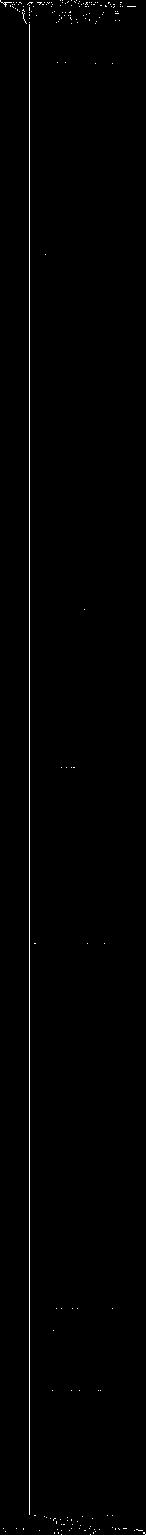

Company 34
	Number of users: 8
	Number of items: 13
	Number of interactions: 14 ( 13.46 %)


Company 35
	Number of users: 44
	Number of items: 50
	Number of interactions: 260 ( 11.82 %)


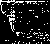

Company 36
	Number of users: 13131
	Number of items: 587
	Number of interactions: 13627 ( 0.18 %)


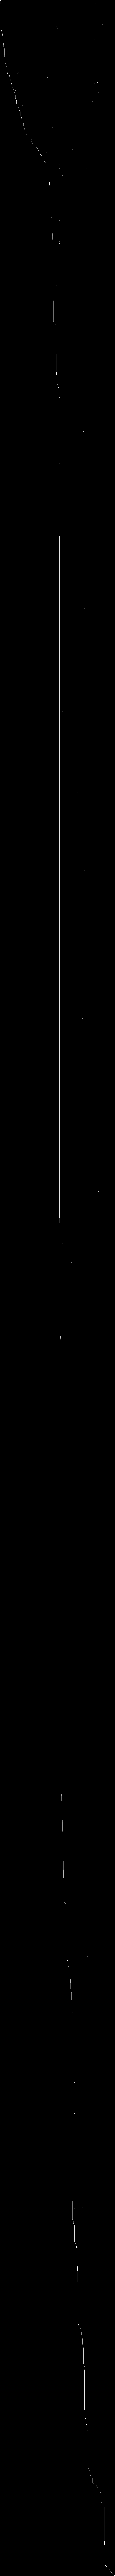

Company 39
	Number of users: 289716
	Number of items: 702
	Number of interactions: 353494 ( 0.17 %)


Company 40
	Number of users: 2007
	Number of items: 219
	Number of interactions: 4789 ( 1.09 %)


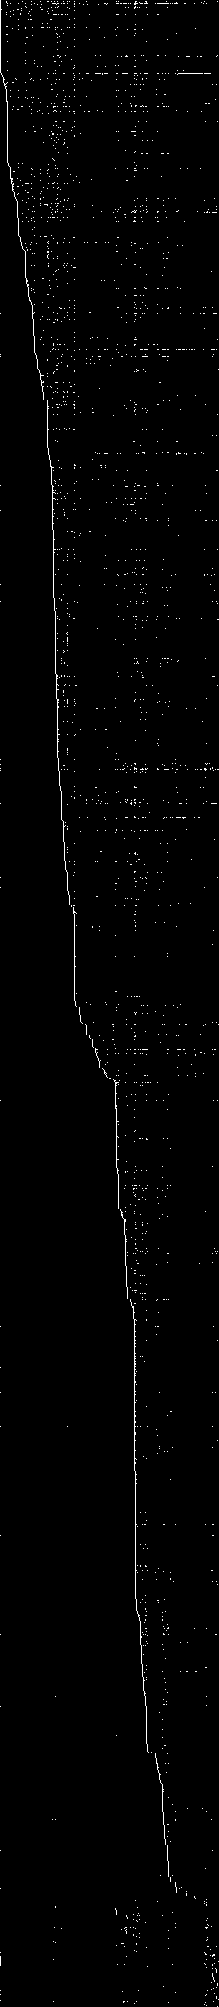

Company 44
	Number of users: 1
	Number of items: 4
	Number of interactions: 4 ( 100.0 %)


In [86]:
def explore_company(df, comp_id):
    num_of_users = df.customer_id.nunique()
    num_of_items = df.product_id.nunique()
    num_of_pairs = len(df)
    matrix_size = num_of_users * num_of_items
    
    print("\tNumber of users:", num_of_users)
    print("\tNumber of items:", num_of_items)
    print("\tNumber of interactions:", num_of_pairs, "(", round(num_of_pairs/matrix_size*100,2), "%)" )
    
    matrix = crete_matrix( df )
    """
    plt.title('Compañia '+ str(comp_id))
    plt.xlabel('Productos')
    plt.ylabel('Usuarios')
    plt.imshow( matrix, interpolation='nearest')
    plt.show()
    """;
    
    display(Image.fromarray(matrix))

for comp_id in company_ids:
    print("Company", comp_id)
    df = df_relation[ df_relation.company_id==comp_id ]
    explore_company(df, comp_id)

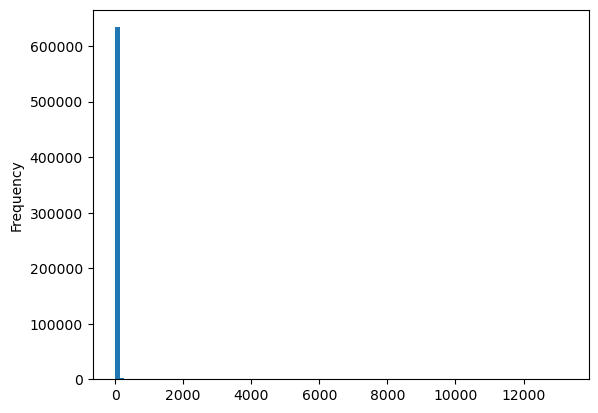

In [5]:
df_relation.peso.plot.hist(bins=100);

In [8]:
df_relation.peso.value_counts().head(20)

3.00     486844
6.00      33501
0.02      21406
0.04      13140
0.08      10703
0.06       9587
9.00       9328
12.00      5095
0.12       2948
15.00      2832
18.00      2299
3.04       2212
3.02       2116
0.16       2106
3.06       1671
3.08       1631
21.00      1618
24.00      1414
0.10       1154
27.00      1019
Name: peso, dtype: int64

In [9]:
df_relation["peso_boxcox"], lmbda = stats.boxcox(df_relation.peso)
print(lmbda)
df_relation

0.18333853353644136


,company_id,product_id,customer_id,peso,ultimo,peso_boxcox
0,1,1,3,6.0,2018-11-29 00:28:00,2.121110
1,1,1,5,183.0,2022-08-29 15:18:18,8.721185
2,1,1,6,6.0,2018-12-24 19:41:00,2.121110
3,1,1,7,39.0,2022-04-29 13:56:42,5.222620
4,1,1,8,3.0,2019-10-10 20:11:00,1.217070
...,...,...,...,...,...,...
636562,40,126862,510949,3.0,2022-10-03 00:20:19,1.217070
636563,40,126863,537570,3.0,2022-10-02 13:39:19,1.217070
636564,40,126864,510626,3.0,2022-10-02 21:58:56,1.217070
636565,40,126971,509931,3.0,2022-10-02 22:42:54,1.217070


<AxesSubplot:ylabel='Frequency'>

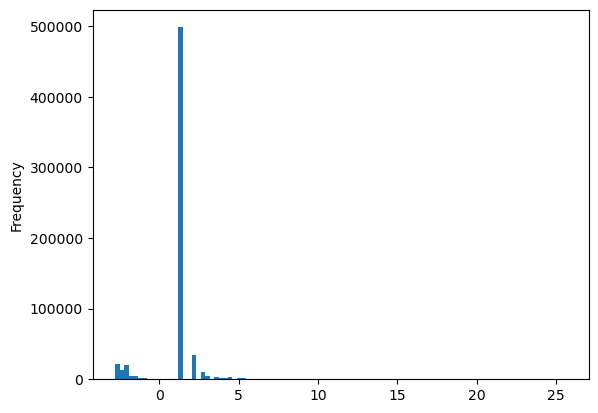

In [10]:
df_relation.peso_boxcox.plot.hist(bins=100)

In [44]:
df_relation.peso_boxcox.min(), df_relation.peso_boxcox.max()

(-2.7920748927290626, 25.626627721213385)

In [11]:
df_comp23_relation = df_relation[ df_relation.company_id==23 ]
df_comp23_relation

,company_id,product_id,customer_id,peso,ultimo,peso_boxcox
146424,23,28888,118364,0.08,2022-08-12 20:15:34,-2.021655
146425,23,28890,532280,0.08,2022-08-12 20:08:26,-2.021655
146426,23,28891,101041,0.08,2022-08-12 19:06:38,-2.021655
146427,23,28892,116295,0.08,2022-08-12 11:14:09,-2.021655
146428,23,28893,117588,0.08,2022-08-13 04:15:28,-2.021655
...,...,...,...,...,...,...
636512,23,57621,537317,0.04,2022-01-14 10:09:18,-2.431308
636513,23,57739,537317,0.04,2022-01-14 10:09:08,-2.431308
636514,23,58193,111111,0.04,2022-10-02 23:16:52,-2.431308
636515,23,58743,537565,0.04,2022-08-26 19:25:13,-2.431308


In [15]:
df_comp23_relation.product_id.nunique()

6311

In [31]:
explore_company(df_comp23_relation)

	Number of users: 18088
	Number of items: 6311
	Number of interactions: 88005 ( 0.08 %)


In [12]:
from fastai.tabular.all import *
from fastai.collab import *

In [13]:
dls = CollabDataLoaders.from_df(ratings=df_comp23_relation,
                                valid_pct=0.2,
                                user_name="customer_id",
                                item_name="product_id",
                                rating_name="peso_boxcox",
                                seed=None,
                                bs=64)

In [14]:
dls.show_batch()

,customer_id,product_id,peso_boxcox
0,103965,52101,1.217070
1,115821,57220,1.217070
2,101884,53266,1.217070
3,119790,52805,1.217070
4,116952,55206,1.217070
5,102100,51768,2.705713
6,118176,51680,-2.198017
7,105476,52021,1.217070
8,109931,50691,1.217070
9,109949,53433,1.217070


In [45]:
learn = collab_learner(dls, n_factors=50, y_range=(-3, 26))


In [46]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,31.181622,29.042986,00:04
1,9.845145,11.084537,00:04
2,6.007298,9.651947,00:04
3,3.446176,9.362500,00:04
4,2.467165,9.341358,00:04


In [ ]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

In [47]:
9.341358**2

87.26096928416399

In [48]:
0.91**2

0.8281000000000001